In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import io
import zipfile

In [3]:
# Carga de todos los archivos de zip
with zipfile.ZipFile("dataset/RLCS 2021-22 Dataset.zip") as z:
    games_by_players_df = pd.read_csv(io.StringIO(z.read("games_by_players.csv").decode("utf-8")), low_memory=False)
    games_by_teams_df = pd.read_csv(io.StringIO(z.read("games_by_teams.csv").decode("utf-8")))
    main_df = pd.read_csv(io.StringIO(z.read("main.csv").decode("utf-8")))
    matches_by_players_df = pd.read_csv(io.StringIO(z.read("matches_by_players.csv").decode("utf-8")))
    matches_by_teams_df = pd.read_csv(io.StringIO(z.read("matches_by_teams.csv").decode("utf-8")))
    players_db_df = pd.read_csv(io.StringIO(z.read("players_db.csv").decode("utf-8")))

In [7]:
# Filtro para dejar solo las columnas necesarias
matches_by_teams_df_fil = matches_by_teams_df.filter(['color',
                                                  'team_id',
                                                  'team_name',
                                                  'team_region',
                                                  'core_shots',
                                                  'core_goals',
                                                  'core_saves',
                                                  'core_assists',
                                                  'core_score',
                                                  'boost_amount_collected',
                                                  'boost_amount_stolen',
                                                  'boost_time_zero_boost',
                                                  'movement_total_distance',
                                                  'movement_time_supersonic_speed',
                                                  'movement_time_boost_speed',
                                                  'movement_time_slow_speed',
                                                  'movement_time_ground',
                                                  'movement_time_low_air',
                                                  'movement_time_high_air',
                                                  'positioning_time_defensive_half',
                                                  'positioning_time_offensive_half',
                                                  'demo_inflicted',
                                                  'demo_taken',
                                                  'score',
                                                  'winner'])

# Gráficos preliminares

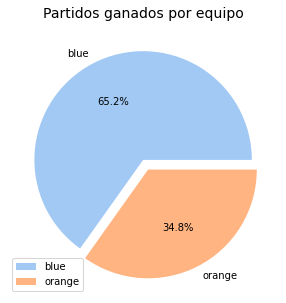

In [8]:
# Agrupamos los partidos ganados por equipo
color_win_group_matches = matches_by_teams_df_fil.groupby('color')[['color', 'winner']].sum().reset_index()
# Se crea gráfico de torta
fig,ax = plt.subplots(figsize=(12,5))
colors = sns.color_palette('pastel')
explode = (0, 0.1)
plt.pie(color_win_group_matches.winner,
        labels=color_win_group_matches.color,
        colors=colors,
        autopct = '%1.1f%%',
        explode = explode)
ax.set_title('Partidos ganados por equipo', fontsize=14, x=0.5)
ax.legend()
plt.show()

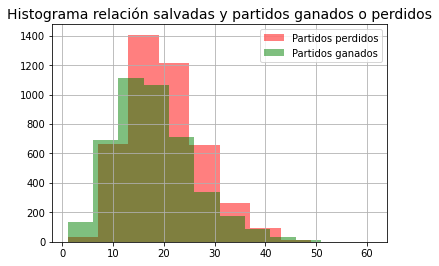

In [9]:
# En las siguientes líneas de código se crea un gráfico de histograma para mostrar la relación entre el número de salvadas y los partidos ganados o perdidos.
fig,ax = plt.subplots(figsize=(6,4))
# Se crea un histograma para los partidos perdidos con color rojo y ganados con color verde
matches_by_teams_df_fil[matches_by_teams_df_fil['winner'] == False]['core_saves'].hist(alpha=0.5, label='Partidos perdidos', color='red')
matches_by_teams_df_fil[matches_by_teams_df_fil['winner'] == True]['core_saves'].hist(alpha=0.5, label='Partidos ganados', color='green')
ax.set_title(label='Histograma relación salvadas y partidos ganados o perdidos', fontsize=14, x=0.5)
plt.legend()
plt.show()

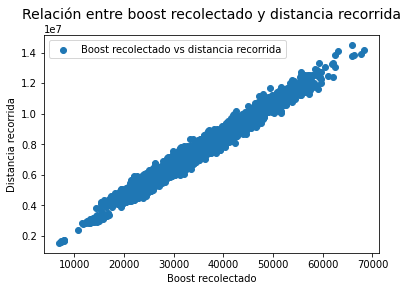

In [10]:
x = matches_by_teams_df_fil['boost_amount_collected']
y = matches_by_teams_df_fil['movement_total_distance']
fig,ax = plt.subplots(figsize=(6,4))
plt.scatter(x=x, y=y, label='Boost recolectado vs distancia recorrida')
ax.set_title(label='Relación entre boost recolectado y distancia recorrida', fontsize=14, x=0.5)
plt.xlabel('Boost recolectado')
plt.ylabel('Distancia recorrida')
plt.legend()
plt.show()

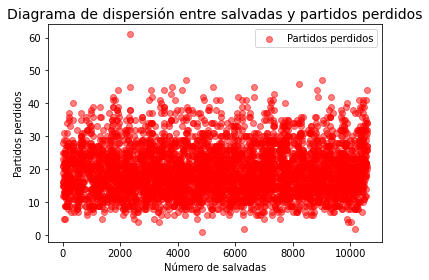

In [11]:
# Filtrar los partidos perdidos y el número de salvadas en base a los partidos perdidos
x = matches_by_teams_df_fil[matches_by_teams_df_fil['winner'] == False]
y = x['core_saves']

# Crear gráfico
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x=x.index, y=y, alpha=0.5, label='Partidos perdidos', color='red')
ax.set_title(label='Diagrama de dispersión entre salvadas y partidos perdidos', fontsize=14, x=0.5)
ax.set_xlabel('Número de salvadas')
ax.set_ylabel('Partidos perdidos')
plt.legend()
plt.show()

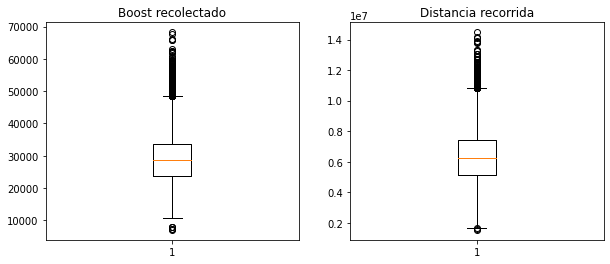

In [12]:
# Como pudimos ver anteriormente, estas columnas tienen datos nulos, y al intentar hacer el gráfico con los datos nan, realmente no mostraba el resultado del gráfico.
# Para resolver esto, se verificó la mediana de cada columna y luego con el método fillna() se reemplazaron las filas nulas con este dato
x_median = matches_by_teams_df_fil['boost_amount_collected'].median()
y_median = matches_by_teams_df_fil['movement_total_distance'].median()
x = matches_by_teams_df_fil['boost_amount_collected'].fillna(x_median)
y = matches_by_teams_df_fil['movement_total_distance'].fillna(y_median)

# Se crearán 2 subplots para mostrar un diagrama por cada variable
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))

# Primer boxplot con boost recolectado
ax[0].boxplot(x)
ax[0].set_title('Boost recolectado')

# Segundo boxplot con distancia recorrido
ax[1].boxplot(y)
ax[1].set_title('Distancia recorrida')

plt.show()

# Parte 2

In [13]:
win_group_matches = matches_by_teams_df_fil.groupby('team_name')[['team_name', 'winner']].sum().sort_values('winner', ascending=False).reset_index()
group_team_region = matches_by_teams_df_fil.groupby('team_name')[['team_region']].first().reset_index()
win_group_matches = win_group_matches.merge(group_team_region, on='team_name', how='left')
win_group_matches.head(10)

,team_name,winner,team_region
0,G2 ESPORTS,62,North America
1,TOKYO VERDY ESPORTS,60,Asia-Pacific North
2,TEAM BDS,56,Europe
3,FURIA ESPORTS,56,South America
4,PIRATES EXDEE,53,Sub-Saharan Africa
5,NRG ESPORTS,51,North America
6,TEAM FALCONS,50,Middle East & North Africa
7,RENEGADES,49,Oceania
8,DETONATOR,48,Asia-Pacific North
9,FAZE CLAN,47,North America


In [14]:
# Se realizará el análisis separado por región, para esto cada df se almacenarán en un diccionario donde la clave será el nombre de la región
# Crear un diccionario vacío para almacenar los resultados y un array con las regiones
region_results = {}
regions = matches_by_teams_df_fil['team_region'].unique()

# Con un for se hará un filtro de cada región y luego con el mismo procedimiento anterior se creará un df por cada región
for region in regions:
    # Filtrar el DataFrame por región
    matches_by_region = matches_by_teams_df_fil[matches_by_teams_df_fil['team_region'] == region]

    win_group_matches = matches_by_region.groupby('team_name')[['team_name', 'winner']].sum().sort_values('winner', ascending=False).reset_index()
    group_team_region = matches_by_region.groupby('team_name')[['team_region']].first().reset_index()
    win_group_matches = win_group_matches.merge(group_team_region, on='team_name', how='left')

    # Agregar los resultados al diccionario
    region_results[region] = win_group_matches.head(10)

    # Las siguientes líneas solo se agregaron para crear un output de todas las regiones
    print(f"Resultados para la región: {region}\n")
    print(region_results[region].to_string(index=False))
    print("\n")

Resultados para la región: Oceania

         team_name  winner team_region
         RENEGADES      49     Oceania
GROUND ZERO GAMING      37     Oceania
       DIRE WOLVES      33     Oceania
         FORKIDDEN      29     Oceania
       BANDITS ESC      23     Oceania
       R!OT GAMING      23     Oceania
        TEAM BLISS      23     Oceania
         BIG GOOSE      22     Oceania
          PIONEERS      22     Oceania
        PHYSICISTS      21     Oceania


Resultados para la región: North America

          team_name  winner   team_region
         G2 ESPORTS      62 North America
        NRG ESPORTS      51 North America
          FAZE CLAN      47 North America
           VERSION1      46 North America
SPACESTATION GAMING      45 North America
              ROGUE      40 North America
 SUSQUEHANNA SONIQS      37 North America
       GHOST GAMING      32 North America
     OXYGEN ESPORTS      31 North America
          TEAM ENVY      31 North America


Resultados para la región: 